<a href="https://colab.research.google.com/github/vvardhan11/Info5731/blob/main/INFO5731_Assignment_Four_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,567 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:14 http://ppa.launchp

In [2]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [4]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options) #creating a driver path
link = 'https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3'
title_array = [] 
review_array = []
driver.get(link)
for num in range(80): #giving range 80 to get all reviews
  driver.find_element(By.CLASS_NAME,"ipl-load-more__button").click() #giving class name as ipl-load-mote__button to get all pages
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")#giving class title to get the titles
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")#giving class text to get the text
for ele, sub_ele in zip(listOfTitle, listOfReviews):#writing a for loop to append each review and title into the empty arrays created
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 2023


,Title,Review
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...
1,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...
2,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...
3,"beautiful science fiction, fantasy and action ...",Everything comes in it beautiful science ficti...
4,A Ringer for a Great MCU Flick,
...,...,...
2018,A Kung Fu Marvel Masterpiece,"This was a Kung fu movie, and a classic Marvel..."
2019,Up there with the best Marvel Origin Movies,"Action packed, exciting and well acted. Everyt..."
2020,Wow what a movie...,Form the moment I sat into theatre I was lost ...
2021,Was not expecting that...,"Like the title I typed, I was not expecting th..."


In [5]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=19a15ed8cc1d1ec1f04900ca5efd0ae8027b3a8bb5c35102d809c91ff4e151c5
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [7]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

In [8]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Tokenization'] = df['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
df['Stemming'] = df['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [9]:
texts = []
for line in df['Stemming']:
  texts.append(line)

In [10]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['got', 'admit', 'wasn', 't', 'particularli', 'blown_away', 'anyth', 'movi', 'might', 'even', 'say', 'bore', 'don', 't', 'get', 'wrong', 'spectacl', 'action', 'great', 'locat', 'nice', 'costum_design', 'sound', 'design', 'etc', 'overal', 'soft', 'releas', 'worth', 'see', 'theater', 'special', 'follow', 'endgam', 'biggest', 'problem', 'underwritten', 'lead', 'muddl', 'person', 'reason', 'cover', 'stori', 'devoid', 'charm', 'person', 'good', 'dialogu', 'next', 'issu', 'humor', 'didn', 't', 'land', 'support', 'lead', 'awkwafina', 'isn', 't', 'normal', 'loud', 'self', 's', 'suppos', 'funni', 'everi', 'time', 'open', 'mouth', 'role', 'support', 'littl', 'dramat', 'question', 'even', 'doesn', 't', 'ultim', 'matter', 'anoth', 'forgett', 'charact', 'given', 'import', 'role', 'deserv', 'final', 'third_act', 'weak', 's', 'balanc', 'problem', 'stake', 'can', 't', 'feel', 'tension', 'weight', 'action', 's', 'lot', 'superfici', 'can', 't', 'can', 'end', 'feel', 'like', 'safe', 'plot', 'written', 'w

In [11]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [12]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['get', 'admit', 'wasn', 't', 'particularli', 'anyth', 'even', 'say', 'bore', 'get', 'wrong', 'spectacl', 'action', 'great', 'nice', 'costum_design', 'sound', 'design', 'overal', 'soft', 'relea', 'worth', 'see', 'theater', 'special', 'follow', 'endgam', 'big', 'problem', 'underwritten', 'lead', 'muddl', 'person', 'reason', 'cover', 'stori', 'devoid', 'charm', 'person', 'good', 'dialogu', 'next', 'land', 'support', 'lead', 'isn', 'normal', 'loud', 'self', 'suppos', 'time', 'open', 'mouth', 'role', 'support', 'dramat', 'question', 'even', 'charact', 'give', 'import', 'role', 'final', 'weak', 'balanc', 'problem', 'stake', 't', 'feel', 'tension', 'weight', 'action', 'lot', 'superfici', 'end', 'feel', 'safe', 'plot', 'write', 'way', 'appeal', 'portray', 'end', 'appeal', 'specif', 'certainli', 'feel', 'marvel', 'movi', 'bind', 'happen', 'differ', 'also', 'feel', 'gener']]


In [16]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 4), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)]]


In [17]:
id2word[0]

'action'

In [18]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 2),
  ('admit', 1),
  ('also', 1),
  ('anyth', 1),
  ('appeal', 2),
  ('balanc', 1),
  ('big', 1),
  ('bind', 1),
  ('bore', 1),
  ('certainli', 1),
  ('charact', 1),
  ('charm', 1),
  ('costum_design', 1),
  ('cover', 1),
  ('design', 1),
  ('devoid', 1),
  ('dialogu', 1),
  ('differ', 1),
  ('dramat', 1),
  ('end', 2),
  ('endgam', 1),
  ('even', 2),
  ('feel', 4),
  ('final', 1),
  ('follow', 1),
  ('gener', 1),
  ('get', 2),
  ('give', 1),
  ('good', 1),
  ('great', 1),
  ('happen', 1),
  ('import', 1),
  ('isn', 1),
  ('land', 1),
  ('lead', 2),
  ('lot', 1),
  ('loud', 1),
  ('marvel', 1),
  ('mouth', 1),
  ('movi', 1),
  ('muddl', 1),
  ('next', 1),
  ('nice', 1),
  ('normal', 1),
  ('open', 1),
  ('overal', 1),
  ('particularli', 1),
  ('person', 2),
  ('plot', 1),
  ('portray', 1),
  ('problem', 2),
  ('question', 1),
  ('reason', 1),
  ('relea', 1),
  ('role', 2),
  ('safe', 1),
  ('say', 1),
  ('see', 1),
  ('self', 1),
  ('soft', 1),
  ('sound', 1),
  ('special

In [19]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"budget" + 0.026*"incorpor" + 0.023*"drama" + 0.019*"serious" + '
  '0.019*"stand" + 0.018*"cliché" + 0.017*"touch" + 0.017*"alway" + '
  '0.016*"obvious" + 0.014*"shoot"'),
 (1,
  '0.039*"develop" + 0.035*"solid" + 0.032*"humor" + 0.026*"strong" + '
  '0.018*"sequel" + 0.017*"miss" + 0.016*"protagonist" + 0.012*"minor" + '
  '0.012*"import" + 0.011*"case"'),
 (2,
  '0.024*"chine" + 0.018*"parent" + 0.016*"share" + 0.016*"money" + '
  '0.015*"human" + 0.014*"warm" + 0.013*"spotlight" + 0.013*"romant" + '
  '0.012*"market" + 0.012*"suffer"'),
 (3,
  '0.039*"predict" + 0.020*"fine" + 0.020*"skill" + 0.018*"decent" + '
  '0.017*"half" + 0.017*"element" + 0.016*"rather" + 0.016*"formula" + '
  '0.016*"total" + 0.015*"wish"'),
 (4,
  '0.051*"line" + 0.034*"credit" + 0.024*"forc" + 0.016*"shame" + 0.016*"cgi" '
  '+ 0.015*"simpl" + 0.011*"mainland" + 0.011*"reveal" + 0.011*"hide" + '
  '0.010*"round"'),
 (5,
  '0.067*"good" + 0.054*"marvel" + 0.050*"movi" + 0.044*"great" + '
  

In [21]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.901005733142037

Coherence Score:  0.44136833083059923


In [22]:
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [23]:
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [25]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.422*"film" + 0.297*"marvel" + 0.215*"good" + 0.198*"movi" + 0.188*"scene" '
  '+ 0.186*"fight" + 0.184*"well" + 0.172*"charact" + 0.170*"see" + '
  '0.168*"make"'),
 (1,
  '0.825*"film" + -0.373*"movi" + -0.171*"good" + -0.130*"just" + '
  '-0.119*"marvel" + -0.098*"make" + -0.096*"scene" + -0.091*"watch" + '
  '-0.076*"see" + -0.075*"stori"'),
 (2,
  '0.741*"marvel" + -0.318*"fight" + 0.224*"movi" + -0.213*"scene" + '
  '-0.166*"just" + -0.149*"mcu" + -0.144*"feel" + -0.107*"way" + '
  '0.098*"action" + -0.093*"charact"'),
 (3,
  '0.587*"good" + 0.337*"scene" + -0.261*"feel" + 0.240*"great" + '
  '-0.213*"just" + 0.195*"action" + 0.193*"fight" + -0.183*"make" + '
  '-0.153*"charact" + -0.143*"much"'),
 (4,
  '-0.439*"movi" + -0.267*"just" + 0.263*"marvel" + -0.229*"film" + '
  '0.221*"charact" + 0.218*"great" + 0.181*"fight" + 0.180*"stori" + '
  '-0.179*"good" + -0.179*"watch"'),
 (5,
  '0.428*"fight" + -0.356*"action" + -0.304*"stori" + 0.266*"marvel" + '
  '-0.261*"great"

In [26]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = df['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.8/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.8/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [28]:
# Write your code here
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [29]:
!pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from textblob import TextBlob

In [31]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [32]:
df['Polarity']=df['Review'].apply(getPolarity)
df

,Title,Review,Lower Case,Tokenization,Tokens,Stemming,Polarity
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...,i got to admit i wasn't particularly blown awa...,"[i, got, to, admit, i, wasn, t, particularly, ...","[got, admit, wasn, t, particularly, blown, awa...","[got, admit, wasn, t, particularli, blown, awa...",0.124091
1,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...,rated 8/10 language: english source: hotstar r...,"[rated, 8, 10, language, english, source, hots...","[rated, 8, 10, language, english, source, hots...","[rate, 8, 10, languag, english, sourc, hotstar...",0.196825
2,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...,the characters are a bit incoherent and straig...,"[the, characters, are, a, bit, incoherent, and...","[characters, bit, incoherent, straight, contra...","[charact, bit, incoher, straight, contradict, ...",0.099490
3,"beautiful science fiction, fantasy and action ...",Everything comes in it beautiful science ficti...,everything comes in it beautiful science ficti...,"[everything, comes, in, it, beautiful, science...","[everything, comes, beautiful, science, fictio...","[everyth, come, beauti, scienc, fiction, beaut...",0.600000
4,A Ringer for a Great MCU Flick,,,[],[],[],0.000000
...,...,...,...,...,...,...,...
2018,A Kung Fu Marvel Masterpiece,"This was a Kung fu movie, and a classic Marvel...","this was a kung fu movie, and a classic marvel...","[this, was, a, kung, fu, movie, and, a, classi...","[kung, fu, movie, classic, marvel, movie, wrap...","[kung, fu, movi, classic, marvel, movi, wrap, ...",0.522222
2019,Up there with the best Marvel Origin Movies,"Action packed, exciting and well acted. Everyt...","action packed, exciting and well acted. everyt...","[action, packed, exciting, and, well, acted, e...","[action, packed, exciting, well, acted, everyt...","[action, pack, excit, well, act, everyth, expe...",0.433333
2020,Wow what a movie...,Form the moment I sat into theatre I was lost ...,form the moment i sat into theatre i was lost ...,"[form, the, moment, i, sat, into, theatre, i, ...","[form, moment, sat, theatre, lost, shang, chi,...","[form, moment, sat, theatr, lost, shang, chi, ...",0.057143
2021,Was not expecting that...,"Like the title I typed, I was not expecting th...","like the title i typed, i was not expecting th...","[like, the, title, i, typed, i, was, not, expe...","[like, title, typed, expecting, lack, advertis...","[like, titl, type, expect, lack, advertis, hyp...",0.120833


In [33]:
#create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Title,Review,Lower Case,Tokenization,Tokens,Stemming,Polarity,Analysis
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...,i got to admit i wasn't particularly blown awa...,"[i, got, to, admit, i, wasn, t, particularly, ...","[got, admit, wasn, t, particularly, blown, awa...","[got, admit, wasn, t, particularli, blown, awa...",0.124091,Positive
1,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...,rated 8/10 language: english source: hotstar r...,"[rated, 8, 10, language, english, source, hots...","[rated, 8, 10, language, english, source, hots...","[rate, 8, 10, languag, english, sourc, hotstar...",0.196825,Positive
2,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...,the characters are a bit incoherent and straig...,"[the, characters, are, a, bit, incoherent, and...","[characters, bit, incoherent, straight, contra...","[charact, bit, incoher, straight, contradict, ...",0.099490,Positive
3,"beautiful science fiction, fantasy and action ...",Everything comes in it beautiful science ficti...,everything comes in it beautiful science ficti...,"[everything, comes, in, it, beautiful, science...","[everything, comes, beautiful, science, fictio...","[everyth, come, beauti, scienc, fiction, beaut...",0.600000,Positive
4,A Ringer for a Great MCU Flick,,,[],[],[],0.000000,Neutral
...,...,...,...,...,...,...,...,...
2018,A Kung Fu Marvel Masterpiece,"This was a Kung fu movie, and a classic Marvel...","this was a kung fu movie, and a classic marvel...","[this, was, a, kung, fu, movie, and, a, classi...","[kung, fu, movie, classic, marvel, movie, wrap...","[kung, fu, movi, classic, marvel, movi, wrap, ...",0.522222,Positive
2019,Up there with the best Marvel Origin Movies,"Action packed, exciting and well acted. Everyt...","action packed, exciting and well acted. everyt...","[action, packed, exciting, and, well, acted, e...","[action, packed, exciting, well, acted, everyt...","[action, pack, excit, well, act, everyth, expe...",0.433333,Positive
2020,Wow what a movie...,Form the moment I sat into theatre I was lost ...,form the moment i sat into theatre i was lost ...,"[form, the, moment, i, sat, into, theatre, i, ...","[form, moment, sat, theatre, lost, shang, chi,...","[form, moment, sat, theatr, lost, shang, chi, ...",0.057143,Positive
2021,Was not expecting that...,"Like the title I typed, I was not expecting th...","like the title i typed, i was not expecting th...","[like, the, title, i, typed, i, was, not, expe...","[like, title, typed, expecting, lack, advertis...","[like, titl, type, expect, lack, advertis, hyp...",0.120833,Positive


Positive    1481
Neutral      305
Negative     237
Name: Analysis, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


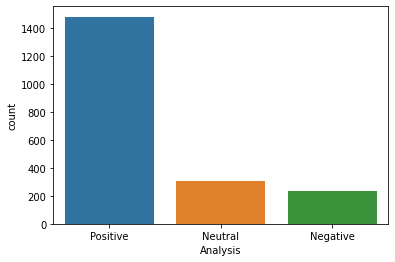

In [34]:
import seaborn as sns
print(df['Analysis'].value_counts())
sns.countplot(df.Analysis)

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(df['Review'])
x_values = Tfidfvector.transform(df['Review'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(df['Analysis'])

In [36]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
report = classification_report(y_test, predicted, output_dict=True)
report

Accuracy score is 0.8888888888888888


{'0': {'precision': 0.9375,
  'recall': 0.29411764705882354,
  'f1-score': 0.44776119402985076,
  'support': 51},
 '1': {'precision': 0.9491525423728814,
  'recall': 0.9032258064516129,
  'f1-score': 0.9256198347107438,
  'support': 62},
 '2': {'precision': 0.8757575757575757,
  'recall': 0.9897260273972602,
  'f1-score': 0.9292604501607716,
  'support': 292},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9208033727101524,
  'recall': 0.7290231603025655,
  'f1-score': 0.7675471596337887,
  'support': 405},
 'weighted avg': {'precision': 0.8947683203662488,
  'recall': 0.8888888888888888,
  'f1-score': 0.8680698817148984,
  'support': 405}}

In [38]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb)))
report_nb = classification_report(y_test, predicted_nb, output_dict=True)
report_nb

Accuracy score is 0.725925925925926


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 1.0,
  'recall': 0.0392156862745098,
  'f1-score': 0.07547169811320754,
  'support': 51},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 62},
 '2': {'precision': 0.7245657568238213,
  'recall': 1.0,
  'f1-score': 0.8402877697841726,
  'support': 292},
 'accuracy': 0.725925925925926,
 'macro avg': {'precision': 0.5748552522746071,
  'recall': 0.34640522875817,
  'f1-score': 0.3052531559657934,
  'support': 405},
 'weighted avg': {'precision': 0.648328891339644,
  'recall': 0.725925925925926,
  'f1-score': 0.6153409515574123,
  'support': 405}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [39]:
# Write your code here
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [41]:
# Write your code here
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [42]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


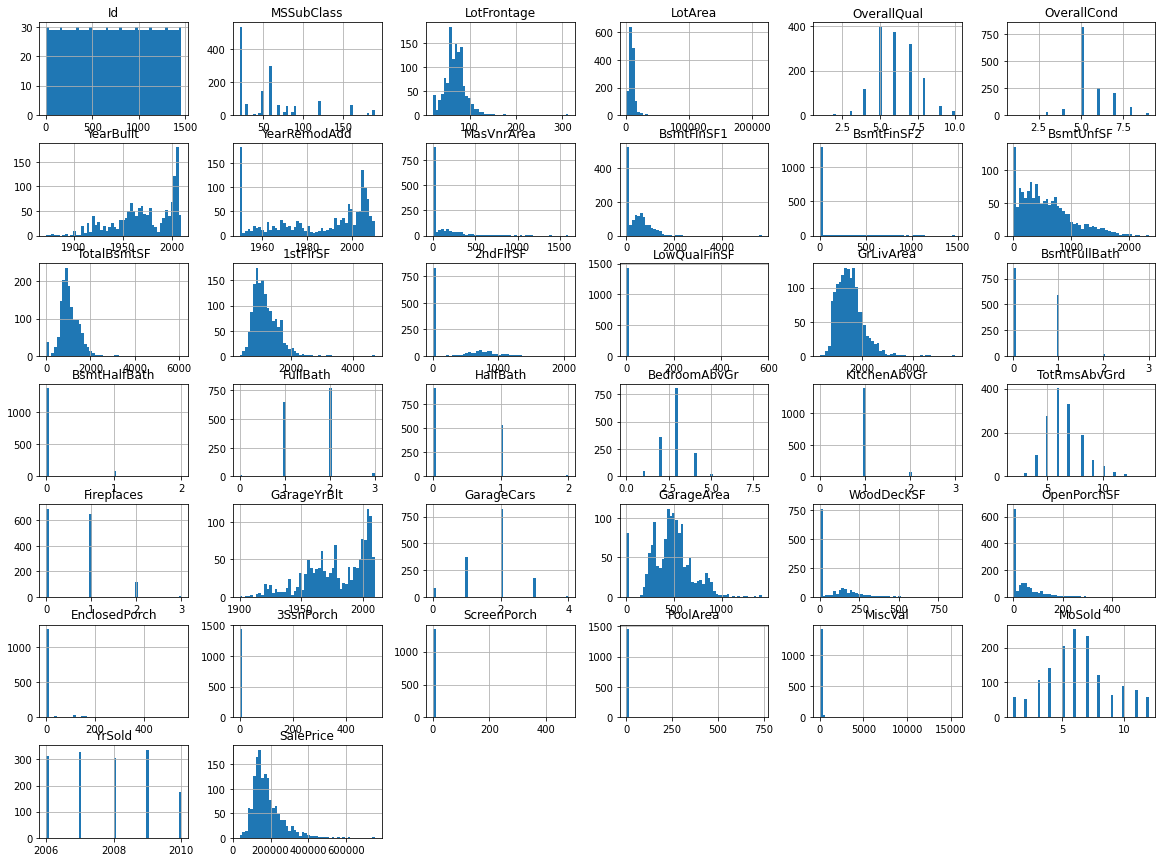

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [45]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

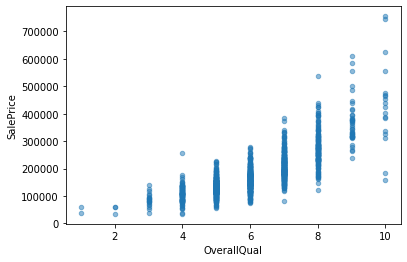

In [46]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

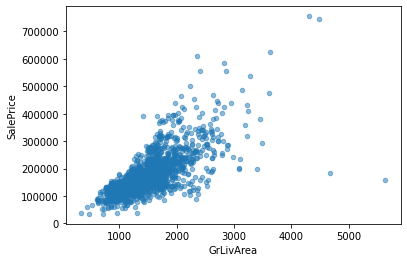

In [47]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

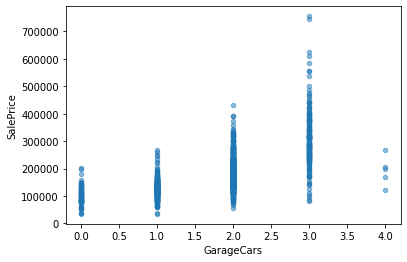

In [48]:
train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

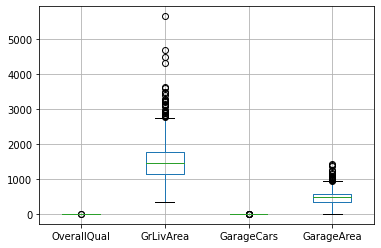

In [49]:
train_dataset.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

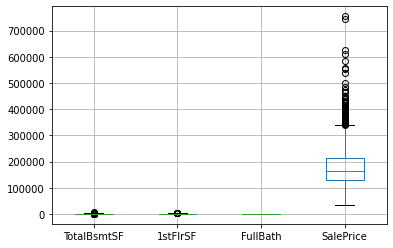

In [50]:
train_dataset.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [51]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

<ipython-input-51-4ecbcb713a9d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_dataset.fillna(train_dataset.mean(), inplace = True)
<ipython-input-51-4ecbcb713a9d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_dataset.fillna(test_dataset.mean(), inplace = True)


In [52]:
print(train_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [53]:
print(test_dataset.isnull().sum())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


In [54]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(list(train_dataset[column].values))

In [55]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(list(test_dataset[column].values))

In [56]:
x_values = train_dataset[train_dataset.columns[:80]] 

In [57]:
x_test_values = test_dataset[test_dataset.columns[:80]]

In [58]:
y_values = train_dataset['SalePrice']

In [59]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8548395143943592

In [60]:
predicted = reg_model.predict(x_test_values)

In [61]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
